## Churn modeling

### Introduction

The term **churn** is used in marketing to refer to a customer leaving the company in favour of a competitor. Churning is a common concern of **Customer Relationship Management** (CRM). A key step in proactive churn management is to predict whether a customer is likely to churn, since an early detection of the potential churners helps to plan the retention campaigns.

In this example, I develop a churn model, based on a **logistic regression equation**, for a company called *Omicron Mobile*, which provides mobile phone services. The data set is based on a random sample of 5,000 customers whose accounts were still alive by September 30, and have been monitored during the fourth quarter. 968 of those customers churned durin g the fourth quarter, which gives us a **churning rate** of 19.4%.

The variables included in the data set are: 

* `id`, a customer ID (the phone number).

* `aclentgh`, the number of days the account has been active at the beginning of the period monitored.

* `intplan`, a dummy for having an international plan.

* `dataplan`, a dummy for having a data plan.

* `datagb`, the gigabytes available according to the data plan.

* `ommin`, the total minutes call to any Omicron mobile phone number, voicemail or national landline.

* `omcall`, the total number of calls to any Omicron mobile phone number, voicemail or national landline.

* `otmin`, the total minutes call to other mobile networks.

* `otcall`, the total number of calls to other networks.

* `ngmin`, the total minutes call to nongeographic numbers. Nongeographic numbers, such as UK 0844 or 0871 numbers, are often helplines for organizations like banks, insurance companies, utilities and charities. 

* `ngcall`, the total number of calls to nongeographic numbers.

* `imin`, the total minutes in international calls.

* `icall`, the total international calls.

* `cuscall`, the number of calls to customer service.

* `churn`, a dummy for churning.

All the data are from the third quarter except the last variable. 

### Importing the data

The data come in a CSV file, which I import with the Pandas function `read_csv`, with an additional argument, `index_col=0`, for the first column to be used as the **index**.

In [1]:
import pandas as pd
churn = pd.read_csv('https://raw.githubusercontent.com/iese-bad/' +
    'DataSci/master/Data/churn.csv', index_col=0)
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 409-8978 to 444-8504
Data columns (total 14 columns):
aclength    5000 non-null int64
intplan     5000 non-null int64
dataplan    5000 non-null int64
datagb      5000 non-null object
ommin       5000 non-null float64
omcall      5000 non-null int64
otmin       5000 non-null float64
otcall      5000 non-null int64
ngmin       5000 non-null float64
ngcall      5000 non-null int64
imin        5000 non-null float64
icall       5000 non-null int64
cuscall     5000 non-null int64
churn       5000 non-null int64
dtypes: float64(4), int64(9), object(1)
memory usage: 585.9+ KB


In [2]:
churn.index[0:10]

Index(['409-8978', '444-7077', '401-9132', '409-2971', '431-5175', '375-5486',
       '400-7151', '390-2169', '420-8569', '446-7327'],
      dtype='object', name='id')

### Checking redundancy

Note that `datagb` takes value `0` when `dataplan` takes value `0`, so we have redundancy here, as illustrated by the table below. I will leave `dataplan` aside, as it is the same as one of the dummies that I will generate to enter `datagb` in the equation.

In [3]:
print(pd.crosstab(churn['datagb'], churn['dataplan']))

dataplan     0    1
datagb             
0         3449    0
1.5G         0  522
100M         0   74
1G           0  410
250M         0  168
2G           0   86
500M         0  291


### Logistic regression model

I first specify the left side of the equation.

In [4]:
y = churn['churn']

Since scikit-learn can only deal with numeric variables on the right side of the equation, I have to generate dummies for `datagb`, which is easily done with the Pandas function `get_dummies`.

In [5]:
X1 = pd.get_dummies(churn['datagb'])
print(X1.head())

          0  1.5G  100M  1G  250M  2G  500M
id                                         
409-8978  1     0     0   0     0   0     0
444-7077  1     0     0   0     0   0     0
401-9132  0     1     0   0     0   0     0
409-2971  1     0     0   0     0   0     0
431-5175  0     1     0   0     0   0     0


Next, I join this set of dummies with a data frame formed by the rest of the columns, with the Pandas function `concat`. The argument `axis=1` specifies that the two data frames are joined columnwise.

In [6]:
X2 = churn[['aclength', 'intplan', 'ommin', 'omcall',
  'otmin', 'otcall', 'ngmin', 'ngcall', 'imin', 'icall', 'cuscall']]
X = pd.concat([X1, X2], axis=1)
print(X.head())

          0  1.5G  100M  1G  250M  2G  500M  aclength  intplan  ommin  omcall  \
id                                                                              
409-8978  1     0     0   0     0   0     0        77        0   80.8      70   
444-7077  1     0     0   0     0   0     0       105        0  131.8      66   
401-9132  0     1     0   0     0   0     0       121        0  212.1      57   
409-2971  1     0     0   0     0   0     0       115        0  186.1      64   
431-5175  0     1     0   0     0   0     0       133        0  166.5      61   

          otmin  otcall  ngmin  ngcall  imin  icall  cuscall  
id                                                            
409-8978  165.9      67   18.6       6   9.5      4        1  
444-7077  131.7     105    5.1       6   6.7      2        0  
401-9132  195.4     140   14.9      14  28.6      8        1  
409-2971  230.9     125   26.5      16   9.9      4        1  
431-5175  176.0      74   36.1      11   5.3      2   

The package scikit-learn has a module called `linear_model`, with various regression methods. We load only the method `LogisticRegression`, which I name `LOGIS`, to make it shorter.

In [7]:
from sklearn.linear_model import LogisticRegression
LOGIS = LogisticRegression()
LOGIS.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predictive scores

The function `predict`, which I already used for the linear regression model, returns **class labels** (1/0), which is not what we are interested in. To get the **scores**, I use `predict_proba`, which returns an array with two columns, a score for class 1 and score for class 0, summing 1.

In [8]:
scores = LOGIS.predict_proba(X)
scores[0:5, 0:5]

array([[0.94699157, 0.05300843],
       [0.9658993 , 0.0341007 ],
       [0.74646309, 0.25353691],
       [0.87223305, 0.12776695],
       [0.92641675, 0.07358325]])

For plotting, I transform the first column of `scores` into a `pandas.Series`. 

In [9]:
score = pd.Series(scores[:, 1])
score.index = churn.index
score.head()

id
409-8978    0.053008
444-7077    0.034101
401-9132    0.253537
409-2971    0.127767
431-5175    0.073583
dtype: float64

The predictive score can be interpreted as the propensity to churn. Reading it so, it would be natural to set the **cutoff** for classification at 0.5. But taking a look at the distribution of the scores can suggest otherwise. In particular, it is interesting to examine the distribution separately in the churners and the non-churners. I start with the churners (Figure 1). 

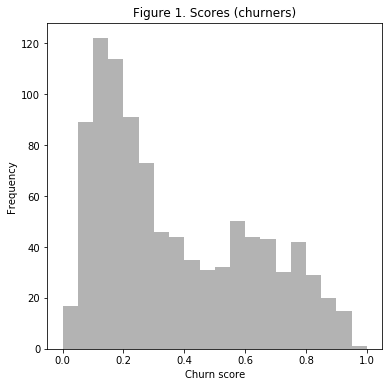

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(1, figsize=(6,6))
plt.hist(score[churn['churn']==1], bins=20, range=(0,1), color='0.7')
plt.title('Figure 1. Scores (churners)')
plt.xlabel('Churn score')
plt.ylabel('Frequency')

Note that I have controlled the **number of bins** with the arguments `bins=20`, `range=(0,1)`. This creates a partition into intervals of length 0.05, which works fine here. I repeat the exercise for the non-churners (Figure 2).

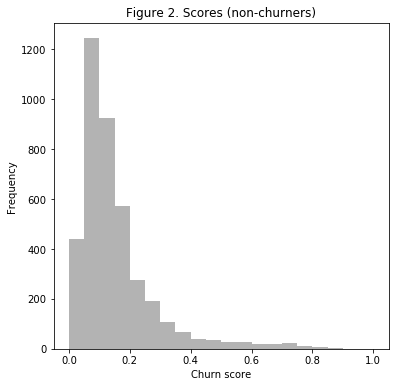

In [11]:
plt.figure(1, figsize=(6,6))
plt.hist(score[churn['churn']==0], bins=20, range=(0,1), color='0.7')
plt.title('Figure 2. Scores (non-churners)')
plt.xlabel('Churn score')
plt.ylabel('Frequency')

### Confusion matrix

The **confusion matrix** is a 2-way table which can be obtained with the `pandas` function `crosstab`. Note that the vector first specified comes in the rows. I start setting the cutoff at 0.5. Taking a look at the above histograms could tell us in advance what we are going to find. In Figure 1, classifying as churners only those customers with score higher than 0.5 will leave out more than one half of the actual churners, which, from a business perspective, looks like a poor job. In compensation, we see in Figure 2 than the vast majority of the non-churners will be classified in the right way. This is, indeed, what the confusion matrix shows.

In [12]:
conf1 = pd.crosstab(score > 0.5, churn['churn'] == 1)
print(conf1)

churn  False  True 
row_0              
False   3895    662
True     137    306


The **true positive (TP) rate** and the **false positive (FP) rate** allow us to be more specific. Here, the FP rate is pretty low, but the TP rate shows that a cutoff so high does not capture enough potential churners. 

In [13]:
tp1 = conf1.iloc[1, 1]/(conf1.iloc[0, 1] + conf1.iloc[1, 1])
tp1.round(3)

0.316

In [14]:
fp1 = conf1.iloc[1, 0]/(conf1.iloc[0, 0] + conf1.iloc[1, 0])
fp1.round(3)

0.034

I set now the cutoff at 0.2. Again, we can guess what will happen from the histograms, but the TP and FP rates allow us to be more specific. 

In [15]:
conf2 = pd.crosstab(score > 0.2, churn['churn'] == 1)
print(conf2)

churn  False  True 
row_0              
False   3181    342
True     851    626


In [16]:
tp2 = conf2.iloc[1, 1]/(conf2.iloc[0, 1] + conf2.iloc[1, 1])
tp2.round(3)

0.647

In [17]:
fp2 = conf2.iloc[1, 0]/(conf2.iloc[0, 0] + conf2.iloc[1, 0])
fp2.round(3)

0.211

Now the results look more acceptable. Nevertheless, in a business application, a **cost/benefit analysis** would be the right way to decide how useful this model could be. I leave this for the homework.